<a href="https://colab.research.google.com/github/paveethranswam/Machine-Learning-Algorithms-Implementation/blob/main/Kmeans_Clustering_and_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from sklearn import datasets

## Pseudocode

### 1. Choose the number of clusters(K)
### 2. Choose random centroids for clusters c1, c2, c3,...,ck
### 3. Now repeat for fixed iterations or until convergence:
### Assign points to nearest centroid
### Recalculate centroid for every cluster - WHICH IS THE MEAN OF ALL POINTS ASSIGNED TO THAT CLUSTER


In [ ]:
iris = datasets.load_iris()
data = iris['data']
data[:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
k = 4
mu_1 = data[0]
mu_2 = data[1]
mu_3 = data[2]
mu_4 = data[3]

# fixed iterations
n_iter = 0
stop_condition = False
c=0

# for iter in range(n_iter) or stop_condition:
while(not stop_condition):
  n_iter+=1
  cluster_1_points = []
  cluster_2_points = []
  cluster_3_points = []
  cluster_4_points = []

  for x_i in data:
    dist_to_mu_1 = np.sqrt( (mu_1[0] - x_i[0])**2 + (mu_1[1] - x_i[1])**2 + (mu_1[2] - x_i[2])**2 + (mu_1[3] - x_i[3])**2 )
    dist_to_mu_2 = np.sqrt( (mu_2[0] - x_i[0])**2 + (mu_2[1] - x_i[1])**2 + (mu_2[2] - x_i[2])**2 + (mu_2[3] - x_i[3])**2 )
    dist_to_mu_3 = np.sqrt( (mu_3[0] - x_i[0])**2 + (mu_3[1] - x_i[1])**2 + (mu_3[2] - x_i[2])**2 + (mu_3[3] - x_i[3])**2 )
    dist_to_mu_4 = np.sqrt( (mu_4[0] - x_i[0])**2 + (mu_4[1] - x_i[1])**2 + (mu_4[2] - x_i[2])**2 + (mu_4[3] - x_i[3])**2 )

    dist_to_all_mu = [dist_to_mu_1, dist_to_mu_2, dist_to_mu_3, dist_to_mu_4]
    min_index = dist_to_all_mu.index(min(dist_to_all_mu))
    
    if(min_index == 0):
      cluster_1_points.append([x_i[0], x_i[1], x_i[2], x_i[3]])
    if(min_index == 1):
      cluster_2_points.append(x_i)
    if(min_index == 2):
      cluster_3_points.append(x_i)
    if(min_index == 3):
      cluster_4_points.append(x_i)

  cluster_1_points = np.array(cluster_1_points)
  cluster_2_points = np.array(cluster_2_points)
  cluster_3_points = np.array(cluster_3_points)
  cluster_4_points = np.array(cluster_4_points)
  
  old_mu_1 = mu_1
  old_mu_2 = mu_2
  old_mu_3 = mu_3
  old_mu_4 = mu_4

  # Recalculating centroid values
  mu_1 = np.array([np.sum(cluster_1_points[:,0])/len(cluster_1_points), np.sum(cluster_1_points[:,1])/len(cluster_1_points), np.sum(cluster_1_points[:,2])/len(cluster_1_points), np.sum(cluster_1_points[:,3])/len(cluster_1_points) ])
  mu_2 = np.array([np.sum(cluster_2_points[:,0])/len(cluster_2_points), np.sum(cluster_2_points[:,1])/len(cluster_2_points), np.sum(cluster_2_points[:,2])/len(cluster_2_points), np.sum(cluster_1_points[:,3])/len(cluster_1_points) ])
  mu_3 = np.array([np.sum(cluster_3_points[:,0])/len(cluster_3_points), np.sum(cluster_3_points[:,1])/len(cluster_3_points), np.sum(cluster_3_points[:,2])/len(cluster_3_points), np.sum(cluster_1_points[:,3])/len(cluster_1_points) ])
  mu_4 = np.array([np.sum(cluster_4_points[:,0])/len(cluster_4_points), np.sum(cluster_4_points[:,1])/len(cluster_4_points), np.sum(cluster_4_points[:,2])/len(cluster_4_points), np.sum(cluster_1_points[:,3])/len(cluster_1_points) ])

  # Check for convergence
  if(np.mean(np.abs(mu_1 - old_mu_1)) < 0.00001 and np.mean(np.abs(mu_2 - old_mu_2)) < 0.00001 and np.mean(np.abs(mu_3 - old_mu_3)) < 0.00001 and np.mean(np.abs(mu_4 - old_mu_4)) < 0.00001 ):
    print('convergence satisfied', n_iter)
    # print(mu_1, mu_2, mu_3, mu_4)
    # print(old_mu_1, old_mu_2, old_mu_3, old_mu_4)
    stop_condition = True





convergence satisfied 17


In [ ]:
print('In first cluster: ', len(cluster_1_points), 'In second cluster: ', len(cluster_2_points), 'In third cluster: ', len(cluster_3_points), 'In fourth cluster: ', len(cluster_4_points))


In first cluster:  22 In second cluster:  50 In third cluster:  50 In fourth cluster:  28


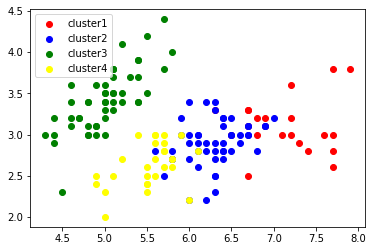

In [ ]:
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'red', label = 'cluster1')
plt.scatter(cluster_2_points[:, 0], cluster_2_points[:, 1], color = 'blue', label = 'cluster2')
plt.scatter(cluster_3_points[:, 0], cluster_3_points[:, 1], color = 'green', label = 'cluster3')
plt.scatter(cluster_4_points[:, 0], cluster_4_points[:, 1], color = 'yellow', label = 'cluster4')
plt.legend()
plt.show()

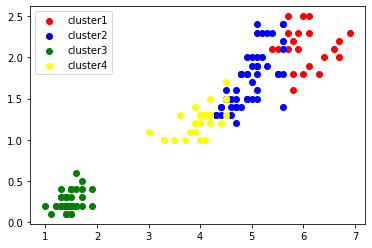

In [ ]:
plt.scatter(cluster_1_points[:, 2], cluster_1_points[:, 3], color = 'red', label = 'cluster1')
plt.scatter(cluster_2_points[:, 2], cluster_2_points[:, 3], color = 'blue', label = 'cluster2')
plt.scatter(cluster_3_points[:, 2], cluster_3_points[:, 3], color = 'green', label = 'cluster3')
plt.scatter(cluster_4_points[:, 2], cluster_4_points[:, 3], color = 'yellow', label = 'cluster4')
plt.legend()
plt.show()

### Vector Quantization using GMM